# Assignment 1
## Applied Machine Learning (BUAN 6341)

### <font color='red'>Due Date: February 14, 2019 11:59pm</font> 

Deliverables:

- Submit your answers to conceptual questions (described in another .pdf file) in a pdf file
- Write down your codes in the given cells described in this file, denoted as "YOUR CODE HERE"
- Use "download as" in the "file" menu to convert your ipython file to a .html file
- Submit three files: .pdf, .ipynb, and .html files to the eLearning


This assignment covers Supervised Learning models. In this assignment, you are required to use two different clean datasets to train FOUR regression models for continous targets and THREE classification models for discrete targets.


The total score of the implementation part is: 70

In [46]:
NAME = "Manisha Gupta"

## Data Exploration

In [47]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [48]:
# This is the California housing dataset.
# The detailed description can be found in https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset
CAhousing = sklearn.datasets.fetch_california_housing()

#CAhousing['DESCR']

In [49]:
print('Features in the housing dataset: ', CAhousing['feature_names'])

Features in the housing dataset:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [50]:
X = CAhousing.data
target = CAhousing.target

In [51]:
# convert the data into a pandas DataFrame, in case you might need to use in the following questions.

df_housing = pd.DataFrame(CAhousing.data,columns=CAhousing.feature_names)
df_housing['target'] = pd.Series(CAhousing.target)
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


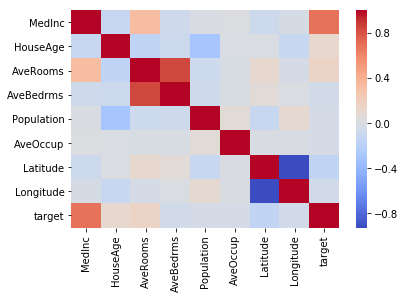

In [52]:
# Explore the correlation plots among variables

# YOUR CODE HERE (5 points)
cols = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','target']
sns.heatmap(df_housing[cols].corr(),cmap = 'coolwarm');




## Regression

In [53]:
# split the dataset into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42)


In [54]:
# Train a linear regression model, report the coefficients and model performance (8 points)

# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

print("Training set score:",(lr.score(X_train, y_train)))
print("Test set score: ",(lr.score(X_test, y_test)))


lr.coef_: [ 4.47600069e-01  9.56752596e-03 -1.24755956e-01  7.94471254e-01
 -1.43902596e-06 -3.44307993e-03 -4.18555257e-01 -4.33405135e-01]
lr.intercept_: -37.027827585269385
Training set score: 0.609873031052925
Test set score:  0.5910509795491352


In [55]:
# Train a polynomial regression model, report the coefficients, the best parameters, and model performance (8 points)
# hint: find the optimal power of polynomial features

# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures()
lreg = LinearRegression()
param_poly = {'polynomialfeatures__degree':range(1,5)}
#apply polynomial regression in pipeline
pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, n_jobs=-1, return_train_score = True)
grid_poly.fit(X_train, y_train)


#find best parameters
print('Best parameters: ', grid_poly.best_params_)


print('train score: ', grid_poly.score(X_train, y_train))
print('test score: ', grid_poly.score(X_test, y_test))

print("training results", grid_poly.cv_results_['mean_train_score'])
print("testing results", grid_poly.cv_results_['mean_test_score'])

# print the coefficients
print('Poly features: ', grid_poly.best_estimator_.named_steps['polynomialfeatures'].n_output_features_)
print('Coefficients: ', grid_poly.best_estimator_.named_steps['linearregression'].coef_)

# OUTPUT of GridSearchCV:
#      cv_results_
#      best_estimator_
#      best_score_
#      best_params_

print(" grid poly_cv :",grid_poly.cv_results_)

y_poly_train_predict = grid_poly.predict(X_train)
y_poly_predict = grid_poly.predict(X_test)

#MSE and MAE
from sklearn.metrics.scorer import mean_squared_error as mse
from sklearn.metrics.scorer import mean_absolute_error as mae

print('Train MSE score', mse(y_poly_train_predict,y_train))
print('Test MSE score',mse(y_poly_predict,y_test) )

print('Train MAE score',mae(y_poly_train_predict,y_train))
print('Test MAE score', mae(y_poly_predict,y_test))

Best parameters:  {'polynomialfeatures__degree': 1}
train score:  0.609873031052925
test score:  0.5910509795491368
training results [0.61006744 0.68577044 0.74209696 0.76071424]
testing results [ 6.07159969e-01 -5.00708656e+01 -1.56646110e+04 -2.85168452e+11]
Poly features:  9
Coefficients:  [ 0.00000000e+00  4.47600069e-01  9.56752596e-03 -1.24755956e-01
  7.94471254e-01 -1.43902596e-06 -3.44307993e-03 -4.18555257e-01
 -4.33405135e-01]
 grid poly_cv : {'mean_fit_time': array([0.03749986, 0.15621581, 0.66717186, 2.17873626]), 'std_fit_time': array([0.01249447, 0.02794472, 0.06994668, 0.83244418]), 'mean_score_time': array([0.00312457, 0.01561995, 0.02573032, 0.06561089]), 'std_score_time': array([0.00624914, 0.00987729, 0.00836161, 0.02072331]), 'param_polynomialfeatures__degree': masked_array(data=[1, 2, 3, 4],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'polynomialfeatures__degree': 1}, {'polynomialfeatures__degree': 

In [56]:
# Train a Ridge regression model, report the coefficients, the best parameters, and model performance (8 points)
# hint: find the optimal alpha

# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
#X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

ridge = Ridge().fit(X_train, y_train)
#print("Training set score: ",(ridge.score(X_train, y_train)))
#print("Test set score: ",(ridge.score(X_test, y_test)))

ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train, y_train)


print('train score: ', grid_ridge.score(X_train, y_train))
print('test score: ', grid_ridge.score(X_test, y_test))

#find best parameters
print('best parameters:',grid_ridge.best_params_)
print('Best cross-validation score:', grid_ridge.best_score_)


train score:  0.609873031052925
test score:  0.5910509801706125
best parameters: {'alpha': 1e-05}
Best cross-validation score: 0.607159968690397


In [57]:
# Train a Lasso regression model, report the coefficients, the best parameters, and model performance (8 points)
# hint: find the optimal alpha

# YOUR CODE HERE

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: ",(lasso.score(X_train, y_train)))
print("Test set score: ",(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

lasso = Lasso()

#define a list of parameters
param_lasso = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True)
grid_lasso.fit(X_train, y_train)


print('train score: ', grid_lasso.score(X_train, y_train))
print('test score: ', grid_lasso.score(X_test, y_test))

#find best parameters
print('Best parameters: ', grid_lasso.best_params_)
print('Best cross-validation score:', grid_lasso.best_score_)


Training set score:  0.2867363771486492
Test set score:  0.2854847529538541
Number of features used: 3
train score:  0.6098726061440054
test score:  0.5911854450188642
Best parameters:  {'alpha': 0.0001}
Best cross-validation score: 0.6071607539633931


 <font color='red'>Summarize your findings:</font> 

Which one is the best? (3 points)

Lasso is best as it got highest test score as compared to all others. Lasso test score is 0.591185445018864 where as every other algorithm are having less test score. Lasso test score is high by 0.000134465469729. the test score for Linear regression, polynomial regression, Ridge and lasso are 0.591050979549135,	0.591050979549136,	0.591050980170612,	0.591185445018864 respectively.


## Classification 

In [58]:
(X, y) = sklearn.datasets.make_moons(n_samples=10000, noise=0.4)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [59]:
# Train a logistic regression model, report the coefficients and model performance (8 points)

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("lr.coef_:", logreg.coef_)
print("lr.intercept_:", logreg.intercept_)

print("Training set score: ",(logreg.score(X_train, y_train)))
print("Test set score: ", (logreg.score(X_test, y_test)))





lr.coef_: [[ 1.28094098 -2.86441535]]
lr.intercept_: [0.12059897]
Training set score:  0.8336
Test set score:  0.8316


In [60]:
# Train a KNN model, report the best parameters and model performance (10 points)
# hint: find the optimal k

# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 3

clf_train = KNeighborsClassifier(n_neighbors)
clf_train.fit(X_train, y_train)

print("Test set predictions:", clf_train.predict(X_test))
#print("Test set accuracy:",(clf_train.score(X_test, y_test)))


knn = KNeighborsClassifier()

# define a list of parameters
#param_knn = {'n_neighbors': [5, 10, 15, 20, 25, 30]}
param_knn = {'n_neighbors': range(5,25,3)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

print('train score: ', grid_knn.score(X_train, y_train))
print('test score: ', grid_knn.score(X_test, y_test))

print("Best Knn Parameter : ", grid_knn.best_params_)


Test set predictions: [0 1 1 ... 1 0 1]
train score:  0.8684
test score:  0.866
Best Knn Parameter :  {'n_neighbors': 23}


In [61]:
# Train a Decision Tree model, report the best parameters and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import mglearn

import warnings
warnings.filterwarnings("ignore")
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
#print("Accuracy on training set: ",(tree.score(X_train, y_train)))
#print("Accuracy on test set: ",(tree.score(X_test, y_test)))
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

#print("Accuracy on training set: ",(tree.score(X_train, y_train)))
#print("Accuracy on test set:", (tree.score(X_test, y_test)))
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)
print("Best Parameter ", grid_tree.best_params_)
print(grid_tree.score(X_test,y_test))
print("Accuracy on training set: ",(grid_tree.score(X_train, y_train)))
print("Accuracy on test set:", (grid_tree.score(X_test, y_test)))



{'max_depth': 1, 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.862
Accuracy on training set:  0.8626666666666667
Accuracy on test set: 0.862


 <font color='red'>Summarize your findings:</font> 

Which one is the best? (2 points)

The Decision tree is best among all others. It has high test score i.e.0.8628 where as Logistic has 0.8404 and Knn has 0.8576.